In [63]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [64]:
#loading the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'class']
dataset = pd.read_csv(url, names=names)

In [65]:
#dimension of the dataset
print(dataset.shape)

(150, 4)


In [66]:
# take a peek at the data
print(dataset.head(20))

     sepal-length  sepal-width  petal-length        class
5.1           3.5          1.4           0.2  Iris-setosa
4.9           3.0          1.4           0.2  Iris-setosa
4.7           3.2          1.3           0.2  Iris-setosa
4.6           3.1          1.5           0.2  Iris-setosa
5.0           3.6          1.4           0.2  Iris-setosa
5.4           3.9          1.7           0.4  Iris-setosa
4.6           3.4          1.4           0.3  Iris-setosa
5.0           3.4          1.5           0.2  Iris-setosa
4.4           2.9          1.4           0.2  Iris-setosa
4.9           3.1          1.5           0.1  Iris-setosa
5.4           3.7          1.5           0.2  Iris-setosa
4.8           3.4          1.6           0.2  Iris-setosa
4.8           3.0          1.4           0.1  Iris-setosa
4.3           3.0          1.1           0.1  Iris-setosa
5.8           4.0          1.2           0.2  Iris-setosa
5.7           4.4          1.5           0.4  Iris-setosa
5.4           

In [67]:
# statistical summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length
count    150.000000   150.000000    150.000000
mean       3.054000     3.758667      1.198667
std        0.433594     1.764420      0.763161
min        2.000000     1.000000      0.100000
25%        2.800000     1.600000      0.300000
50%        3.000000     4.350000      1.300000
75%        3.300000     5.100000      1.800000
max        4.400000     6.900000      2.500000


In [68]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


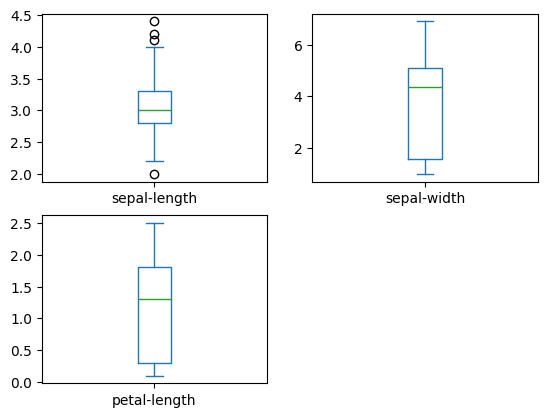

In [69]:
# univariate plots - box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

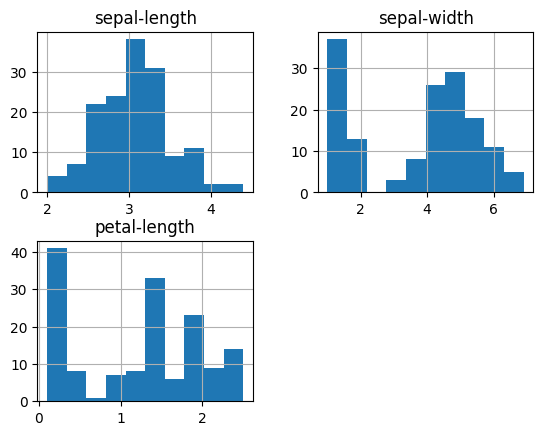

In [70]:
# histogram of variable
dataset.hist()
pyplot.show()

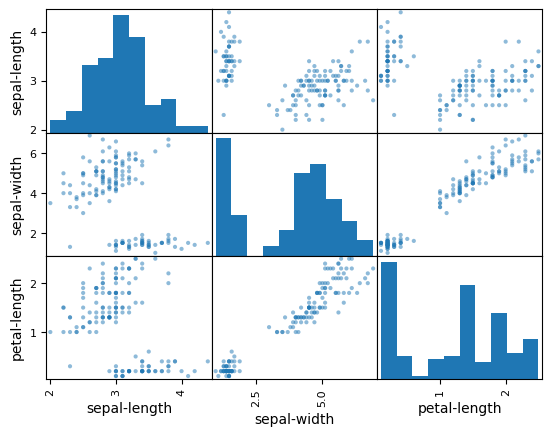

In [71]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [72]:
# creating a validation set
# splitting dataset
array = dataset.values
x = array[:, 0:4]
y = array[:, 3]
x_train, x_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

In [73]:
# Logistic Regression
# Linear Discriminant analysis
# K-Nearest neighbors
# Classification and Regression Trees
# Gaussian Naive Bayes
# Support Vector Machines
# random forest classifier

In [74]:
# building models

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))


In [75]:
# evaluate the created models

result = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
LR: 0.966667 (0.040825)
RF: 0.950000 (0.040825)
SVM: 0.966667 (0.040825)


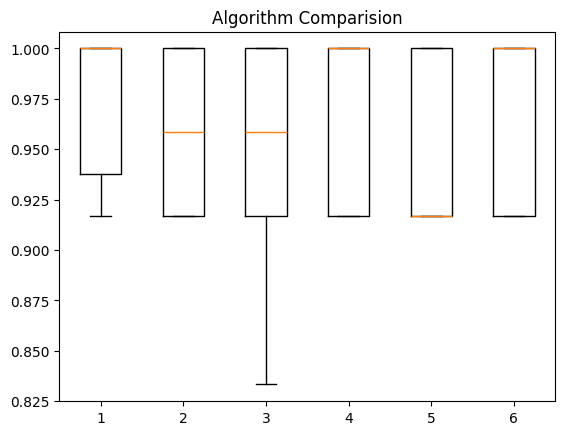

In [76]:
# compare our models
pyplot.boxplot(result, label=names)
pyplot.title('Algorithm Comparision')
pyplot.show()

In [77]:
# make predictions on svm

model = SVC(gamma = 'auto')
model.fit(x_train, y_train)
predictions = model.predict(x_val)

In [78]:
# evaluate our predictions 
print(accuracy_score(y_val, predictions))
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

